## Astroquery examples

Examples from https://astroquery.readthedocs.io/en/latest/

In [1]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("m1")
type(result_table)

astropy.table.table.Table

In [2]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
M 1,05 34 31.94,+22 00 52.2,6,6,--,--,0,C,R,2011A&A...533A..10L


In [3]:
from astropy import coordinates
import astropy.units as u

In [4]:
c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (83.82208333, -5.39111111)>

In [5]:
r = 5 * u.arcminute
r

<Quantity 5. arcmin>

In [6]:
result_table = Simbad.query_region(c, radius=r)
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
M 42,05 35 17.3,-05 23 28,5,5,7500.000,7500.000,90,D,,1981MNRAS.194..693L
NAME Ori Region,05 35 17.30,-05 23 28.0,6,6,--,--,0,D,O,
[OW94] 172-327,05 35 17.2210,-05 23 26.542,9,9,--,--,0,C,R,2016ApJ...822...93F
DOH 7 175-328,05 35 17.5,-05 23 28,5,5,--,--,0,D,,2004AJ....127.3456D
MAX 126,05 35 17.11,-05 23 29.3,6,6,--,--,0,D,I,2005AJ....129.1534R
DOH 7 171-327,05 35 17.1,-05 23 27,5,5,--,--,0,D,,2004AJ....127.3456D
MAX 125,05 35 17.11,-05 23 26.6,6,6,--,--,0,D,I,2005AJ....129.1534R
[OW94] 171-326,05 35 17.1,-05 23 26,5,5,--,--,0,D,,2004AJ....127.3456D


## Gallery

Examples from https://astroquery.readthedocs.io/en/latest/gallery.html

### Example 1

"This illustrates querying Vizier with specific keyword, and the use of astropy.coordinates to describe a query. Vizier’s keywords can indicate wavelength & object type, although only object type is shown here."

In [33]:
from astroquery.vizier import Vizier
from astropy import coordinates
from astropy import units as u

v = Vizier(keywords=['stars:white_dwarf'])

c = coordinates.SkyCoord(0, 0, unit=('deg', 'deg'), frame='icrs')
result = v.query_region(c, radius=2*u.deg)

In [34]:
result

TableList with 50 tables:
	'0:III/70/catalog' with 14 column(s) and 3 row(s) 
	'1:B/wd/catalog' with 14 column(s) and 39 row(s) 
	'2:J/ApJ/607/426/stars' with 13 column(s) and 16 row(s) 
	'3:J/ApJ/663/1291/table2' with 15 column(s) and 1 row(s) 
	'4:J/ApJ/730/128/table1' with 16 column(s) and 11 row(s) 
	'5:J/ApJ/731/17/var' with 18 column(s) and 5 row(s) 
	'6:J/ApJ/765/12/table1' with 23 column(s) and 2 row(s) 
	'7:J/ApJS/167/40/catalog' with 12 column(s) and 33 row(s) 
	'8:J/ApJS/167/40/table5' with 9 column(s) and 1 row(s) 
	'9:J/ApJS/190/77/table1' with 18 column(s) and 1 row(s) 
	'10:J/ApJS/204/5/table2' with 21 column(s) and 35 row(s) 
	'11:J/ApJS/215/24/table4' with 18 column(s) and 14 row(s) 
	'12:J/ApJS/215/24/table5' with 20 column(s) and 1 row(s) 
	'13:J/ApJS/235/16/targets' with 14 column(s) and 50 row(s) 
	'14:J/A+A/419/L5/table1' with 14 column(s) and 7 row(s) 
	'15:J/A+A/466/627/table2' with 11 column(s) and 7 row(s) 
	'16:J/A+A/496/191/table3' with 11 column(s) and 1 ro

In [35]:
result[0]

LP,Rem,Name,RA1950,DE1950,Rmag,l_Pmag,Pmag,u_Pmag,spClass,pm,pmPA,_RA.icrs,_DE.icrs
,,,"""h:m:s""","""d:m:s""",mag,,mag,,,arcsec / yr,deg,,"""d:m:s"""
bytes9,bytes1,bytes11,bytes8,bytes8,float32,bytes1,float32,bytes1,bytes3,float32,int16,bytes10,bytes9
584-0063,,,00 03 23,+00 01.8,18.1,,18.3,,f,0.219,93,00 05 56.8,+00 18 41
643-0083,,,23 50 40,+00 33.4,15.9,,17.0,,k,0.197,93,23 53 13.7,+00 50 15
584-0030,,,23 54 05,-01 32.3,16.6,,17.7,,k,0.199,193,23 56 38.8,-01 15 26


### Example 2

This illustrates adding new output fields to SIMBAD queries. Run list_votable_fields to get the full list of valid fields.


In [36]:
from astroquery.simbad import Simbad

s = Simbad()
# bibcodelist(date1-date2) lists the number of bibliography
# items referring to each object over that date range
s.add_votable_fields('bibcodelist(2003-2013)')
r = s.query_object('m31')

In [37]:
r

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,BIBLIST_2003_2013
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,C,I,2006AJ....131.1163S,4177


### Example 3

This illustrates finding the spectral type of some particular star.

In [38]:
from astroquery.simbad import Simbad

customSimbad = Simbad()
customSimbad.add_votable_fields('sptype')

result = customSimbad.query_object('g her')

In [39]:
result['MAIN_ID']

* g Her


In [40]:
result['SP_TYPE']

M6-III


### Example 4


In [41]:
from astropy import coordinates
from astroquery.simbad import Simbad

customSimbad = Simbad()

# We've seen errors where ra_prec was NAN, but it's an int: 
# that's a problem; this is a workaround we adapted
customSimbad.add_votable_fields('ra(d)', 'dec(d)')
customSimbad.remove_votable_fields('coordinates')

C = coordinates.SkyCoord(0, 0, unit=('deg', 'deg'), frame='icrs')

result = customSimbad.query_region(C, radius='2 degrees')

result[:5]

MAIN_ID,RA_d,DEC_d
,deg,deg
object,float64,float64
Fermi bn100227067,0.00000000,0.00000000
SDSS J000004.21+000122.4,0.01755000,0.02288900
SDSS-II SN 14480,0.01745800,0.02296100
QSO B2357-003A,359.99986200,-0.03287500
SDSS J235956.96+000245.7,359.98735400,0.04604800


### Example 5

"This illustrates a simple usage of the open_exoplanet_catalogue module.  Finding the mass of a specific planet"

In [42]:
from astroquery import open_exoplanet_catalogue as oec
from astroquery.open_exoplanet_catalogue import findvalue

cata = oec.get_catalogue()
kepler68b = cata.find(".//planet[name='Kepler-68 b']")
print(findvalue(kepler68b, 'mass'))


0.026 +0.008 -0.007


### Example 6

"Grab some data from ALMA, then analyze it using the Spectral Cube package after identifying some spectral lines in the data."



The following doesn't work due to a version conflict between astropy and spectral_cube.  It might resolve itself before we need anything from spectral_cube.

https://github.com/nanograv/PINT/issues/493

In [ ]:
# If we're running on Colab, install libraries

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install spectral-cube

In [43]:
from astroquery.alma import Alma
from astroquery.splatalogue import Splatalogue
from astroquery.simbad import Simbad
from astropy import units as u
from astropy import constants
from spectral_cube import SpectralCube

m83table = Alma.query_object('M83', public=True)
m83urls = Alma.stage_data(m83table['Member ous id'])
# Sometimes there can be duplicates: avoid them with
# list(set())
# also, to save time, we just download the first one
m83files = Alma.download_and_extract_files(list(set(m83urls['URL']))[0])
m83files = m83files

Simbad.add_votable_fields('rv_value')
m83simbad = Simbad.query_object('M83')
rvel = m83simbad['RV_VALUE'][0]*u.Unit(m83simbad['RV_VALUE'].unit)

for fn in m83files:
    if 'line' in fn:
        cube = SpectralCube.read(fn)
        # Convert frequencies to their rest frequencies
        frange = u.Quantity([cube.spectral_axis.min(),
                             cube.spectral_axis.max()]) * (1+rvel/constants.c)

        # Query the top 20 most common species in the frequency range of the
        # cube with an upper energy state <= 50K
        lines = Splatalogue.query_lines(frange[0], frange[1], top20='top20',
                                        energy_max=50, energy_type='eu_k',
                                        only_NRAO_recommended=True)
        lines.pprint()

        # Change the cube coordinate system to be in velocity with respect
        # to the rest frequency (in the M83 rest frame)
        rest_frequency = lines['Freq-GHz'][0]*u.GHz / (1+rvel/constants.c)
        vcube = cube.with_spectral_unit(u.km/u.s,
                                        rest_value=rest_frequency,
                                        velocity_convention='radio')

        # Write the cube with the specified line name
        fmt = "{Species}{Resolved QNs}"
        row = lines[0]
        linename = fmt.format(**dict(zip(row.colnames, row.data)))
        vcube.write('M83_ALMA_{linename}.fits'.format(linename=linename))

ImportError: cannot import name 'six'

### Example 7

"Find ALMA pointings that have been observed toward M83, then overplot the various fields-of view on a 2MASS image retrieved from SkyView. 

See http://nbviewer.jupyter.org/gist/keflavich/19175791176e8d1fb204 for the notebook. 

There is an even more sophisticated version at http://nbviewer.jupyter.org/gist/keflavich/bb12b772d6668cf9181a, which shows Orion KL in all observed bands.
"

Author information at http://www.adamgginsburg.com/

This one is not currently working because the code the parse the results fails.  

In [19]:
import numpy as np
from astroquery.alma import Alma
from astroquery.skyview import SkyView
import string
from astropy import units as u
from astropy.io import fits
from astropy import wcs
from astropy import log
import pylab as pl
import aplpy
import pyregion

In [20]:
# Retrieve M83 2MASS K-band image:
m83_images = SkyView.get_images(position='M83', survey=['2MASS-K'],
                                pixels=1500)

In [21]:
# Retrieve ALMA archive information *including* private data and non-science
# fields:
m83 = Alma.query_object('M83', public=False, science=False)

In [22]:
# Parse components of the ALMA data.  Specifically, find the frequency support
# - the frequency range covered - and convert that into a central frequency for
# beam radius estimation.
def parse_frequency_support(frequency_support_str):
    supports = frequency_support_str.split("U")
    freq_ranges = [(float(sup.strip('[] ').split("..")[0]),
                    float(sup.strip('[] ')
                          .split("..")[1]
                          .split(', ')[0]
                          .strip(string.ascii_letters)))
                   *u.Unit(sup.strip('[] ')
                           .split("..")[1]
                           .split(', ')[0]
                           .strip(string.punctuation+string.digits))
                   for sup in supports]
    return u.Quantity(freq_ranges)

In [23]:
def approximate_primary_beam_sizes(frequency_support_str):
    freq_ranges = parse_frequency_support(frequency_support_str)
    beam_sizes = [(1.22*fr.mean().to(u.m,
                                     u.spectral())/(12*u.m)).to(u.arcsec,
                                                                u.dimensionless_angles())
                  for fr in freq_ranges]
    return u.Quantity(beam_sizes)

In [24]:
primary_beam_radii = [approximate_primary_beam_sizes(row['Frequency support']) 
                      for row in m83]

ValueError: could not convert string to float: '101.58GHz,488.29kHz,11.6mJy/beam@10km/s,695.2uJy/beam@'

In [25]:
# Compute primary beam parameters for the public and private components of the data for plotting below.
print("The bands used include: ", np.unique(m83['Band']))

The bands used include:  Band
----
 [3]
 [4]
 [6]
 [7]
 [8]


In [26]:
private_circle_parameters = [(row['RA'], row['Dec'], np.mean(rad).to(u.deg).value)
                             for row, rad in zip(m83, primary_beam_radii)
                             if row['Release date']!=b'' and row['Band']==3]
public_circle_parameters = [(row['RA'], row['Dec'], np.mean(rad).to(u.deg).value)
                             for row, rad in zip(m83, primary_beam_radii)
                             if row['Release date']==b'' and row['Band']==3]

unique_private_circle_parameters = np.array(list(set(private_circle_parameters)))
unique_public_circle_parameters = np.array(list(set(public_circle_parameters)))

print("BAND 3")
print("PUBLIC:  Number of rows: {0}.  Unique pointings: {1}".format(len(m83), len(unique_public_circle_parameters)))
print("PRIVATE: Number of rows: {0}.  Unique pointings: {1}".format(len(m83), len(unique_private_circle_parameters)))

NameError: name 'primary_beam_radii' is not defined

In [ ]:
private_circle_parameters_band6 = [(row['RA'], row['Dec'], np.mean(rad).to(u.deg).value)
                             for row, rad in zip(m83, primary_beam_radii)
                             if row['Release date']!=b'' and row['Band']==6]
public_circle_parameters_band6 = [(row['RA'], row['Dec'], np.mean(rad).to(u.deg).value)
                             for row, rad in zip(m83, primary_beam_radii)
                             if row['Release date']==b'' and row['Band']==6]

INFO: Auto-setting vmin to  5.517e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.798e+02 [aplpy.core]


NameError: name 'unique_private_circle_parameters' is not defined

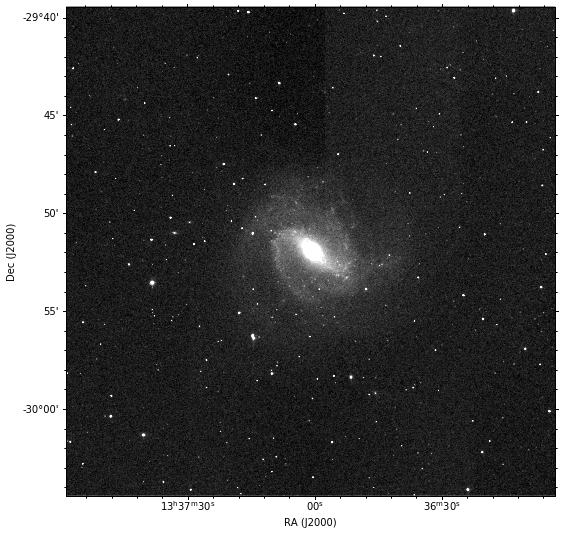

In [27]:
# Show all of the private observation pointings that have been acquired
fig = aplpy.FITSFigure(m83_images[0])
fig.show_grayscale(stretch='arcsinh', vmid=0.1)
fig.show_circles(unique_private_circle_parameters[:, 0],
                 unique_private_circle_parameters[:, 1],
                 unique_private_circle_parameters[:, 2],
                 color='r', alpha=0.2)

INFO: Auto-setting vmin to  5.515e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.898e+02 [aplpy.core]


NameError: name 'unique_public_circle_parameters' is not defined

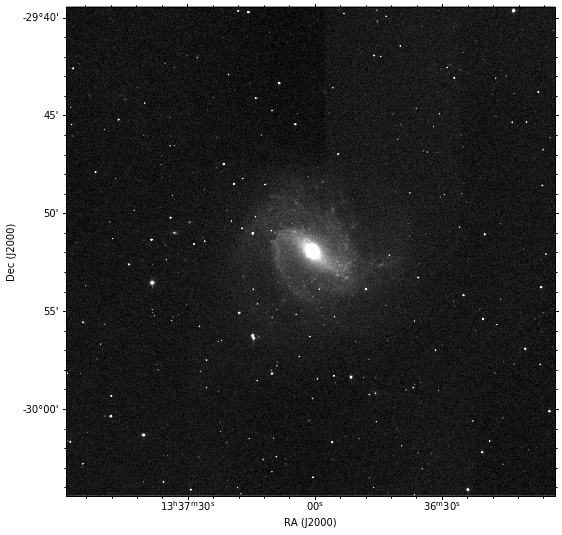

In [28]:
fig = aplpy.FITSFigure(m83_images[0])
fig.show_grayscale(stretch='arcsinh', vmid=0.1)
fig.show_circles(unique_public_circle_parameters[:, 0],
                 unique_public_circle_parameters[:, 1],
                 unique_public_circle_parameters[:, 2],
                 color='b', alpha=0.2)

In [29]:
# Use pyregion to write the observed regions to disk.  Pyregion has a very
# awkward API; there is (in principle) work in progress to improve that
# situation but for now one must do all this extra work.

import pyregion
from pyregion.parser_helper import Shape
prv_regions = pyregion.ShapeList([Shape('circle', [x, y, r]) for x, y, r in private_circle_parameters])
pub_regions = pyregion.ShapeList([Shape('circle', [x, y, r]) for x, y, r in public_circle_parameters])
for r, (x, y, c) in zip(prv_regions+pub_regions,
                     np.vstack([private_circle_parameters,
                                public_circle_parameters])):
    r.coord_format = 'fk5'
    r.coord_list = [x, y, c]
    r.attr = ([], {'color': 'green',  'dash': '0 ',  'dashlist': '8 3 ',  'delete': '1 ',  'edit': '1 ',
                   'fixed': '0 ',  'font': '"helvetica 10 normal roman"',  'highlite': '1 ',
                   'include': '1 ',  'move': '1 ',  'select': '1 ',  'source': '1',  'text': '',
                   'width': '1 '})

prv_regions.write('M83_observed_regions_private_March2015.reg')
pub_regions.write('M83_observed_regions_public_March2015.reg')

prv_mask = fits.PrimaryHDU(prv_regions.get_mask(m83_images[0][0]).astype('int'),
                           header=m83_images[0][0].header)
pub_mask = fits.PrimaryHDU(pub_regions.get_mask(m83_images[0][0]).astype('int'),
                           header=m83_images[0][0].header)

pub_mask.writeto('public_m83_almaobs_mask.fits', clobber=True)

fig = aplpy.FITSFigure(m83_images[0])
fig.show_grayscale(stretch='arcsinh', vmid=0.1)
fig.show_contour(prv_mask, levels=[0.5, 1], colors=['r', 'r'])
fig.show_contour(pub_mask, levels=[0.5, 1], colors=['b', 'b'])

NameError: name 'private_circle_parameters' is not defined

In [ ]:
# ## More advanced ##
#
# Now we create a 'hit mask' showing the relative depth of each observed field in each band

hit_mask_band3_public = np.zeros_like(m83_images[0][0].data)
hit_mask_band3_private = np.zeros_like(m83_images[0][0].data)
hit_mask_band6_public = np.zeros_like(m83_images[0][0].data)
hit_mask_band6_private = np.zeros_like(m83_images[0][0].data)

mywcs = wcs.WCS(m83_images[0][0].header)

In [ ]:
def pyregion_subset(region, data, mywcs):
    """
    Return a subset of an image (`data`) given a region.
    """
    shapelist = pyregion.ShapeList([region])
    if shapelist[0].coord_format not in ('physical', 'image'):
        # Requires astropy >0.4...
        # pixel_regions = shapelist.as_imagecoord(self.wcs.celestial.to_header())
        # convert the regions to image (pixel) coordinates
        celhdr = mywcs.sub([wcs.WCSSUB_CELESTIAL]).to_header()
        pixel_regions = shapelist.as_imagecoord(celhdr)
    else:
        # For this to work, we'd need to change the reference pixel after cropping.
        # Alternatively, we can just make the full-sized mask... todo....
        raise NotImplementedError("Can't use non-celestial coordinates with regions.")
        pixel_regions = shapelist

    # This is a hack to use mpl to determine the outer bounds of the regions
    # (but it's a legit hack - pyregion needs a major internal refactor
    # before we can approach this any other way, I think -AG)
    mpl_objs = pixel_regions.get_mpl_patches_texts()[0]

    # Find the minimal enclosing box containing all of the regions
    # (this will speed up the mask creation below)
    extent = mpl_objs[0].get_extents()
    xlo, ylo = extent.min
    xhi, yhi = extent.max
    all_extents = [obj.get_extents() for obj in mpl_objs]
    for ext in all_extents:
        xlo = int(xlo if xlo < ext.min[0] else ext.min[0])
        ylo = int(ylo if ylo < ext.min[1] else ext.min[1])
        xhi = int(xhi if xhi > ext.max[0] else ext.max[0])
        yhi = int(yhi if yhi > ext.max[1] else ext.max[1])

    log.debug("Region boundaries: ")
    log.debug("xlo={xlo}, ylo={ylo}, xhi={xhi}, yhi={yhi}".format(xlo=xlo,
                                                                  ylo=ylo,
                                                                  xhi=xhi,
                                                                  yhi=yhi))


    subwcs = mywcs[ylo:yhi, xlo:xhi]
    subhdr = subwcs.sub([wcs.WCSSUB_CELESTIAL]).to_header()
    subdata = data[ylo:yhi, xlo:xhi]

    mask = shapelist.get_mask(header=subhdr,
                              shape=subdata.shape)
    log.debug("Shapes: data={0}, subdata={2}, mask={1}".format(data.shape, mask.shape, subdata.shape))
    return (xlo, xhi, ylo, yhi), mask

In [ ]:
for row, rad in zip(m83, primary_beam_radii):
    shape = Shape('circle', (row['RA'], row['Dec'], np.mean(rad).to(u.deg).value))
    shape.coord_format = 'fk5'
    shape.coord_list = (row['RA'], row['Dec'], np.mean(rad).to(u.deg).value)
    shape.attr = ([], {'color': 'green',  'dash': '0 ',  'dashlist': '8 3 ',
                       'delete': '1 ',  'edit': '1 ', 'fixed': '0 ',
                       'font': '"helvetica 10 normal roman"',  'highlite': '1 ',
                       'include': '1 ',  'move': '1 ',  'select': '1 ',
                       'source': '1',  'text': '', 'width': '1 '})

    if row['Release date']==b'' and row['Band']==3:
        (xlo, xhi, ylo, yhi), mask = pyregion_subset(shape, hit_mask_band3_private, mywcs)
        hit_mask_band3_private[ylo:yhi, xlo:xhi] += row['Integration']*mask
    elif row['Release date'] and row['Band']==3:
        (xlo, xhi, ylo, yhi), mask = pyregion_subset(shape, hit_mask_band3_public, mywcs)
        hit_mask_band3_public[ylo:yhi, xlo:xhi] += row['Integration']*mask
    elif row['Release date'] and row['Band']==6:
        (xlo, xhi, ylo, yhi), mask = pyregion_subset(shape, hit_mask_band6_public, mywcs)
        hit_mask_band6_public[ylo:yhi, xlo:xhi] += row['Integration']*mask
    elif row['Release date']==b'' and row['Band']==6:
        (xlo, xhi, ylo, yhi), mask = pyregion_subset(shape, hit_mask_band6_private, mywcs)
        hit_mask_band6_private[ylo:yhi, xlo:xhi] += row['Integration']*mask

In [ ]:
fig = aplpy.FITSFigure(m83_images[0])
fig.show_grayscale(stretch='arcsinh', vmid=0.1)
for mask, color in zip([hit_mask_band3_public,
                        hit_mask_band3_private,
                        hit_mask_band6_public,
                        hit_mask_band6_private,
                       ],
                       'rycb'):

    if np.any(mask):
        fig.show_contour(fits.PrimaryHDU(data=mask, header=m83_images[0][0].header),
                         levels=np.logspace(0, 5, base=2, num=6), colors=[color]*6)

###  Example 8

"Retrieve data from a particular co-I or PI from the ESO archive"

This one requires a password.

In [30]:
from astroquery.eso import Eso
import shutil

# log in so you can get proprietary data
Eso.login('aginsburg')
# make sure you don't filter out anything
Eso.ROW_LIMIT = 1e6

# List all of your pi/co projects
all_pi_proj = Eso.query_instrument('apex', pi_coi='ginsburg')

# Have a look at the project IDs only
print(set(all_pi_proj['APEX Project ID']))
# set(['E-095.F-9802A-2015', 'E-095.C-0242A-2015', 'E-093.C-0144A-2014'])

# The full project name includes prefix and suffix
full_proj = 'E-095.F-9802A-2015'
proj_id = full_proj[2:-6]

# Then get the APEX quicklook "reduced" data
tbl = Eso.query_apex_quicklooks(prog_id=proj_id)

# and finally, download it
files = Eso.retrieve_data(tbl['Product ID'])

# then move the files to your local directory
for fn in files:
    shutil.move(fn, '.')

KeyboardInterrupt: 

## Example 9

"Retrieve an image from skyview and overlay a Vizier catalog on it. This example approximately reproduces Figure 1 of 2016ApJ…826…16E, except with a different background."

http://adsabs.harvard.edu/abs/2016ApJ...826...16E

[100, 200, 100, 200]

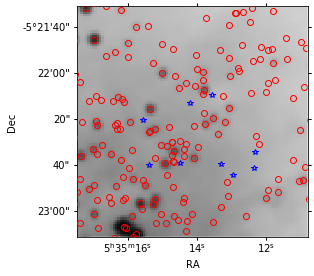

In [31]:
from astropy import coordinates, units as u, wcs
from astroquery.skyview import SkyView
from astroquery.vizier import Vizier
import pylab as pl

center = coordinates.SkyCoord.from_name('Orion KL')

# Grab an image from SkyView of the Orion KL nebula region
imglist = SkyView.get_images(position=center, survey='2MASS-J')

# the returned value is a list of images, but there is only one
img = imglist[0]

# 'img' is now a fits.HDUList object; the 0th entry is the image
mywcs = wcs.WCS(img[0].header)

fig = pl.figure(1)
fig.clf() # just in case one was open before
# use astropy's wcsaxes tool to create an RA/Dec image
ax = fig.add_axes([0.15, 0.1, 0.8, 0.8], projection=mywcs)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

ax.imshow(img[0].data, cmap='gray_r', interpolation='none', origin='lower',
          norm=pl.matplotlib.colors.LogNorm())


# retrieve a specific table from Vizier to overplot
tablelist = Vizier.query_region(center, radius=5*u.arcmin,
                                catalog='J/ApJ/826/16/table1')
# again, the result is a list of tables, so we'll get the first one
result = tablelist[0]

# convert the ra/dec entries in the table to astropy coordinates
tbl_crds = coordinates.SkyCoord(result['RAJ2000'], result['DEJ2000'],
                                unit=(u.hour, u.deg), frame='fk5')

# we want this table too:
tablelist2 = Vizier(row_limit=10000).query_region(center, radius=5*u.arcmin,
                                                  catalog='J/ApJ/540/236')
result2 = tablelist2[0]
tbl_crds2 = coordinates.SkyCoord(result2['RAJ2000'], result2['DEJ2000'],
                                 unit=(u.hour, u.deg), frame='fk5')


# overplot the data in the image
ax.plot(tbl_crds.ra, tbl_crds.dec, '*', transform=ax.get_transform('fk5'),
        mec='b', mfc='none')
ax.plot(tbl_crds2.ra, tbl_crds2.dec, 'o', transform=ax.get_transform('fk5'),
        mec='r', mfc='none')
# zoom in on the relevant region
ax.axis([100, 200, 100, 200])

### Example 10

"Retrieve Hubble archival data of M83 and make a figure"

In [32]:
from astroquery.mast import Mast, Observations
from astropy.visualization import make_lupton_rgb, ImageNormalize
import matplotlib.pyplot as plt
import reproject

result = Observations.query_object('M83')
selected_bands = result[(result['obs_collection'] == 'HST') &
                        (result['instrument_name'] == 'WFC3/UVIS') &
                        ((result['filters'] == 'F657N') |
                         (result['filters'] == 'F487N') |
                         (result['filters'] == 'F336W')) &
                        (result['target_name'] == 'MESSIER-083')]

prodlist = Observations.get_product_list(selected_bands)
filtered_prodlist = Observations.filter_products(prodlist)

downloaded = Observations.download_products(filtered_prodlist)

blue = fits.open(downloaded['Local Path'][2])
red = fits.open(downloaded['Local Path'][5])
green = fits.open(downloaded['Local Path'][8])

target_header = red['SCI'].header
green_repr, _ = reproject.reproject_interp(green['SCI'], target_header)
blue_repr, _ = reproject.reproject_interp(blue['SCI'], target_header)


rgb_img = make_lupton_rgb(ImageNormalize(vmin=0, vmax=1)(red['SCI'].data),
                          ImageNormalize(vmin=0, vmax=0.3)(green_repr),
                          ImageNormalize(vmin=0, vmax=1)(blue_repr),
                          stretch=0.1,
                          minimum=0,
                         )

plt.imshow(rgb_img, origin='lower', interpolation='none')

OSError: Header missing END card.